In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Functions
# dx/dt = f(x,t)
def f(x,t):
    return x


# Euler step
# f - the function
# tn - the time to estimate at
# h - the timestep
# x0 - the initial condition
def euler_step(f, tn, h, x0):
    xn1 = x0 + h*f(x0, tn)
    return xn1

def rk4_step(f, tn, h, x0):

    k1 = h * f(x0, tn)
    k2 = h * f((x0+h/2), (tn+k1/2))
    k3 = h * f((x0+h/2), (tn+k2/2))
    k4 = h * f((x0+h), (tn+k3))
    k = (k1+2*k2+2*k3+k4)/6

# solve to
def solve_to(f,x0,t1,t2,deltat_max, method):
    timesteps = int((t2-t1)/deltat_max)
    x = x0

    if method == 'euler':
        for step in range(timesteps):
            x = euler_step(f, step, deltat_max, x)
        return x
    elif method == 'rk4':
        for step in range(timesteps):
            x = rk4_step(f, step, deltat_max, x)
        return x

# solve the ode
def solve_ode(f,t,x0,deltat_max, method):

    x_series = [x0]
    x = x0

    for i in range(len(t)-1):
        
        x = solve_to(f,x,t[i],t[i+1],deltat_max, method)
        x_series.append(x)

    return x_series



In [5]:
# print(solve_to(f, 1, 0, 1, 0.0001))
# print(solve_to(f, 2.718, 1, 2, 0.0001))
# print(solve_to(f, 1, 2, 3, 0.0001))

# print(solve_ode(f, [0,.1,.2,.3], 1, 0.0001))

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

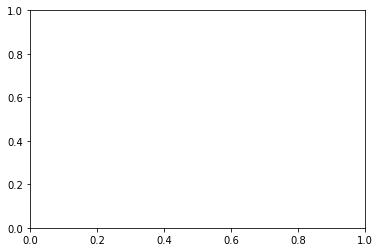

In [12]:
ax = plt.subplot()

t = np.arange(0.0, 5.0, 0.01)
s1 = np.exp(t)
s2 = solve_ode(f, t, 1, 0.01, 'rk4')
plt.plot(t, s1, lw=2)
plt.plot(t, s2, lw=2)
# plt.yscale('log')
plt.show()